# Using SEP to detect objects in an image

#### Import necessary packages, use astropy.io.fits instead of fitsio. (Audrey)

In [88]:
%matplotlib inline
import numpy as np
import sep
import matplotlib.pyplot as plt
from astropy.io import fits
from matplotlib import rcParams
from matplotlib.patches import Ellipse

In [89]:
rcParams['figure.figsize'] = [10., 8.]

#### Open the FITS file. Read image (downloaded from the sep GitHub account) into standard 2-D numpy array.

In [90]:
fname = "sep_example_image.fits"
hdu_list = fits.open(fname)
hdu_list.info()
image_data = hdu_list[0].data

Filename: sep_example_image.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     337   (256, 256)   int16 (rescales to float32)   


ESO-LOG 00:00:00> DATE         = '1992-10-26'  / Mon Oct 26, 1992                [astropy.io.fits.card]
ESO-LOG 03:04:08>-START EXPO EMMI RED          / Start exp. on EMMI Red CC       [astropy.io.fits.card]
ESO-LOG 03:04:09> EXPO EMMI RED NO = 24887     / Exp. num. on EMMI Red CCD       [astropy.io.fits.card]
ESO-LOG 03:10:52>-STOP EXPO EMMI RED           / Stop exp. on EMMI Red CCD       [astropy.io.fits.card]


#### Close the FITS file.

In [91]:
hdu_list.close()

#### Show the image

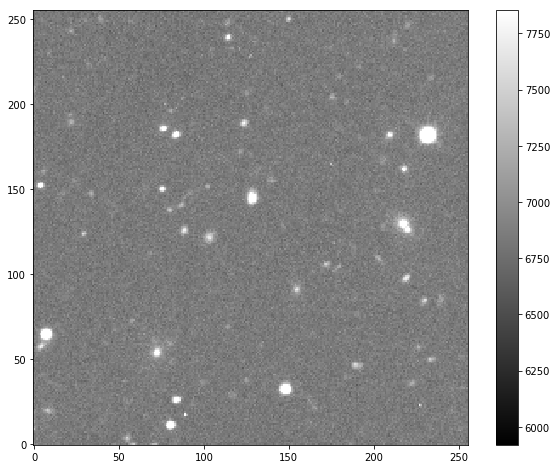

In [92]:
m = np.mean(image_data)
s = np.std(image_data)

plt.imshow(image_data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar()
plt.savefig('raw_image.png');

#  Background subtraction

#### Measure a spatially varying background on the image

In [93]:
bkg = sep.Background(image_data)

#### Get a "global" mean and noise of the image background

In [94]:
print(bkg.globalback)
print(bkg.globalrms)

6852.04931640625
65.46174621582031


#### Evaluate background as 2-D array, same size as original image

In [95]:
bkg_image = bkg.back()

#### Show the background

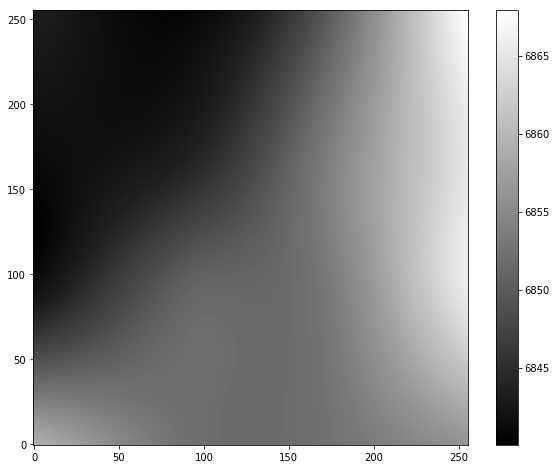

In [96]:
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar()
plt.savefig('background.png');

#### Evaluate the background noise as 2-D array, same size as original image

In [97]:
bkg_rms = bkg.rms()

#### Show the background noise

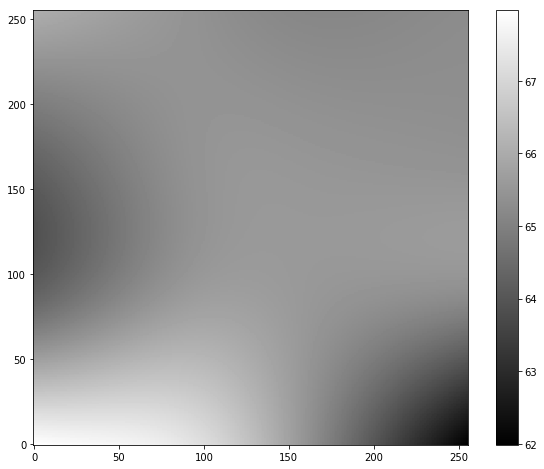

In [98]:
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar()
plt.savefig('background_noise.png');

#### Subtract the background

In [99]:
image_data_sub = image_data - bkg

# Object detection

#### Set the detection threshold to a constant value

In [107]:
objects = sep.extract(image_data_sub, 1.5, err=bkg.globalrms)

n = len(objects)
print('%d objects detected'%n)

69 objects detected


#### Plot background-subtracted image with a red ellipse for each object

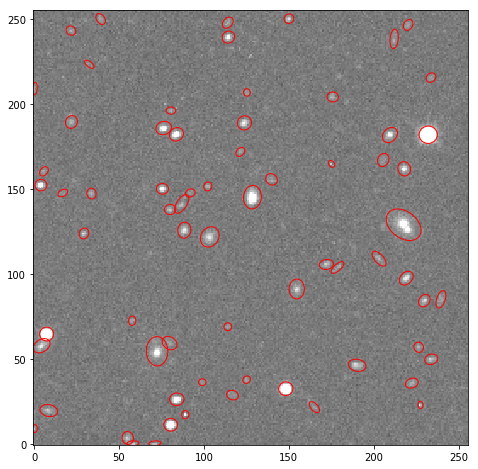

In [101]:
fig, ax = plt.subplots()
m = np.mean(image_data_sub)
s= np.std(image_data_sub)
im = ax.imshow(image_data_sub, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')

for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)
    
plt.savefig('detected_objects.png')

# Aperture photometry

#### Perform simple circular aperture photometry with a 3 pixel radius at the locations of the objects

In [103]:
flux, fluxerr, flag = sep.sum_circle(image_data_sub, objects['x'], objects['y'], 3.0, err=bkg.globalrms, gain=1.0)

#### Show the objects results

In [108]:
for i in range(n):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

object 0: flux = 2249.159297 +/- 291.027802
object 1: flux = 3092.220430 +/- 291.592204
object 2: flux = 5949.868379 +/- 356.562003
object 3: flux = 1851.426582 +/- 295.028816
object 4: flux = 72736.386914 +/- 440.172206
object 5: flux = 3860.756152 +/- 352.163162
object 6: flux = 6418.913789 +/- 357.458973
object 7: flux = 2210.707656 +/- 350.791223
object 8: flux = 2741.607227 +/- 352.277746
object 9: flux = 20916.875566 +/- 376.966138
object 10: flux = 2940.234180 +/- 351.585835
object 11: flux = 2135.050176 +/- 351.659584
object 12: flux = 263051.195430 +/- 619.177471
object 13: flux = 4205.270684 +/- 354.107137
object 14: flux = 2240.924668 +/- 351.566392
object 15: flux = 8921.247090 +/- 359.514663
object 16: flux = 5424.506680 +/- 355.342484
object 17: flux = 3408.620273 +/- 352.980473
object 18: flux = 4254.974551 +/- 353.693015
object 19: flux = 22778.135234 +/- 379.200896
object 20: flux = 11145.091387 +/- 362.830603
object 21: flux = 281617.316426 +/- 634.668347
object 22: f